In [1]:
%matplotlib inline

from simulation.community import Community, VoteConstraints
from simulation.student import Student
from simulation.artifact import Quality
from reputation.algorithm import allAlgorithms
from output.chart import chart
from output.metrics import printMetrics, printStdDevMetrics

# Friends Test


In this test, it is evaluated how many friends who are significantly less competent
than their peers are required to trick the system so that they reach top position
in the reputation ranking.

In [2]:
testName = "Friends"
community = Community()

### Actions

Action Prototypes


In [3]:
postGoodArtefact = community.createPostAction(Quality.GOOD)
postBadArtefact = community.createPostAction(Quality.BAD)
voteBadNegative = community.createVoteAction(Quality.BAD, VoteConstraints.BADART)
voteAnyNegative = community.createVoteAction(Quality.BAD, VoteConstraints.NONE)
voteGoodPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.GOODART)
voteAnyPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.NONE)
voteFriend = community.createVoteAction(Quality.GOOD, VoteConstraints.FRIEND)

### Student Archetypes

The first group are highly competent students that don't know each other.

In [4]:
unaff_num = 25;

unaffiliated = Student("unaffiliated",
        [
            (0.27, postGoodArtefact),
            (0.03, postBadArtefact),
            (0.315, voteBadNegative),
            (0.035, voteAnyNegative),
            (0.315, voteGoodPositive),
            (0.035, voteAnyPositive),
        ])
community.addStudents(unaffiliated, unaff_num)

The second group is a significantly smaller, significantly less competent group of friends that only upvote each other.

In [5]:
friends = Student("f",
        [
            (0.06, postGoodArtefact),
            (0.24, postBadArtefact),
            (0.7, voteFriend),
        ])

friends.addFriends([unaff_num, unaff_num+1]);

community.addStudents(friends, 2)

## Synthesis

Reputation scores are based on 100 actions by the students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Mean & Std. Dev.: InDegree ########
Distinction: 6.49393778718 ± 4.56522884872
Correctness: 0.986666666667 ± 0.0284583299441
Inversion Quality: 0.9884 ± 0.0318973353119

######## Mean & Std. Dev.: InDegreePositive ########
Distinction: 0.827952782523 ± 0.78599948595
Correctness: 0.851851851852 ± 2.22044604925e-16
Inversion Quality: 0.0004 ± 0.00397994974843

######## Mean & Std. Dev.: EigenTrust ########
Distinction: 1.40417886653 ± 1.29418340611
Correctness: 0.851851851852 ± 2.22044604925e-16
Inversion Quality: 0.467 ± 0.0722979944397

######## Mean & Std. Dev.: PageRank ########
Distinction: 1.48106277984 ± 1.30637044182
Correctness: 0.851851851852 ± 2.22044604925e-16
Inversion Quality: 0.1126 ± 0.0795313774557


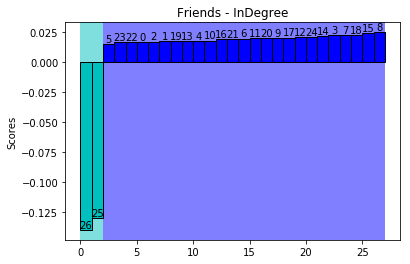

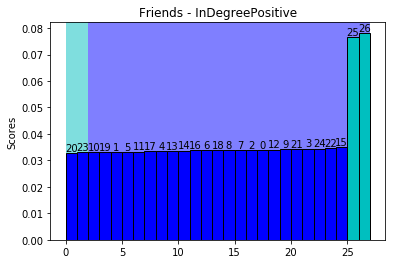

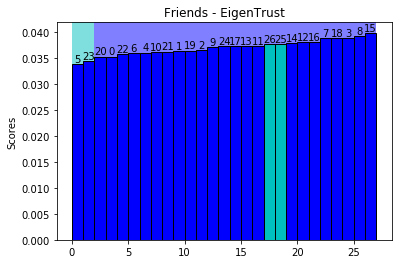

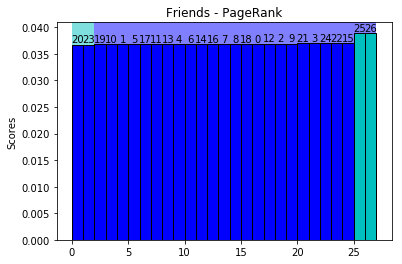

In [6]:
groups = ('f', 'unaffiliated')
colors = {'f': 'c', 'unaffiliated': 'b'}
results = community.run([InDegree(), InDegreePositive(), EigenTrust(), PageRank()], 100, 100)
for (name, result, intermediateResults) in results:
    c = chart(result, groups, colors, testName + " - " + name)
    # printMetrics(name, result, groups)
    printStdDevMetrics(name, intermediateResults, groups)